# Two-Layer Neural Network with Backpropagation for MNIST Digit Classification

#### Import libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mnist_data import MnistData
from two_layer_net_with_back_prop import TwoLayerNetWithBackProp
import os
from PIL import Image
import glob
import subprocess

#### Load MNIST data

In [6]:
mnist = MnistData()
(train_images, train_labels), (test_images, test_labels) = mnist.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


#### Define hyperparameters

In [7]:
input_size = 784
hidden_size = 50
output_size = 10
iterations = 10000
batch_size = 16
learning_rate = 0.01
train_size = train_images.shape[0]
iter_per_epoch = int(train_size / batch_size)

#### Initialize network


In [8]:
network = TwoLayerNetWithBackProp(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

#### Training the network

In [9]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = train_images[batch_mask]
    t_batch = train_labels[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    if i % iter_per_epoch == 0:
        train_loss = network.loss(x_batch, t_batch)
        train_loss_list.append(train_loss)
        
        train_acc = network.accuracy(train_images, train_labels)
        train_acc_list.append(train_acc)
        
        test_acc = network.accuracy(test_images, test_labels)
        test_acc_list.append(test_acc)
        
        print(f'iteration: {i}, train loss: {train_loss:.4f}, train acc: {train_acc:.4f}, test acc: {test_acc:.4f}')

iteration: 0, train loss: 2.3019, train acc: 0.1191, test acc: 0.1219
iteration: 3750, train loss: 0.2850, train acc: 0.8922, test acc: 0.8952
iteration: 7500, train loss: 0.3918, train acc: 0.9103, test acc: 0.9142


#### Saving trained model

In [10]:
network.save_params("adupa_mnist_model.pkl")

#### Ploting the accuracy graph

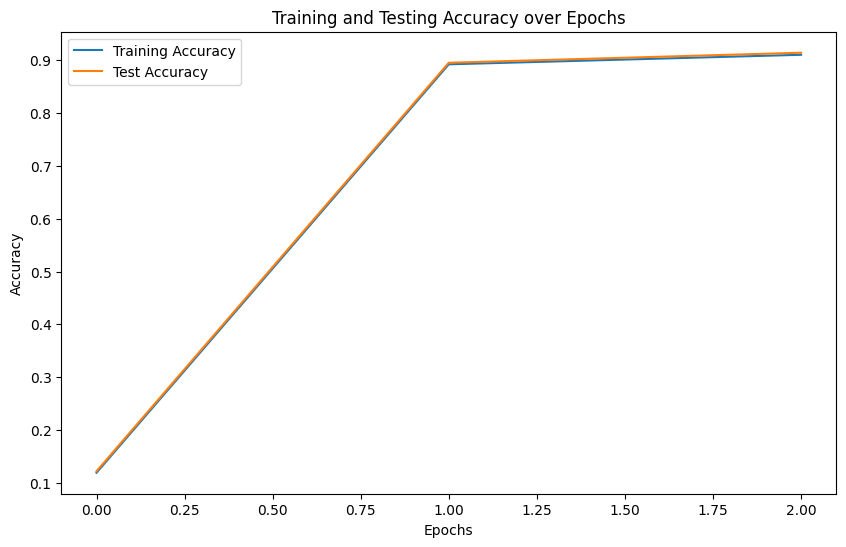

In [12]:
epochs = np.arange(0, len(train_acc_list), 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, train_acc_list, label='Training Accuracy')
plt.plot(epochs, test_acc_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()

#### Function to load Custom handwritten digit image

In [20]:
def load_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28), Image.LANCZOS)
    img_array = np.asarray(img).astype(np.float32)
    img_array = img_array.flatten()
    img_array = (255.0 - img_array) / 255.0  
    return img_array

#### Path to my custom handwritten samples

In [25]:
custom_samples_dir = "Custom MNIST Samples/"


#### List all images

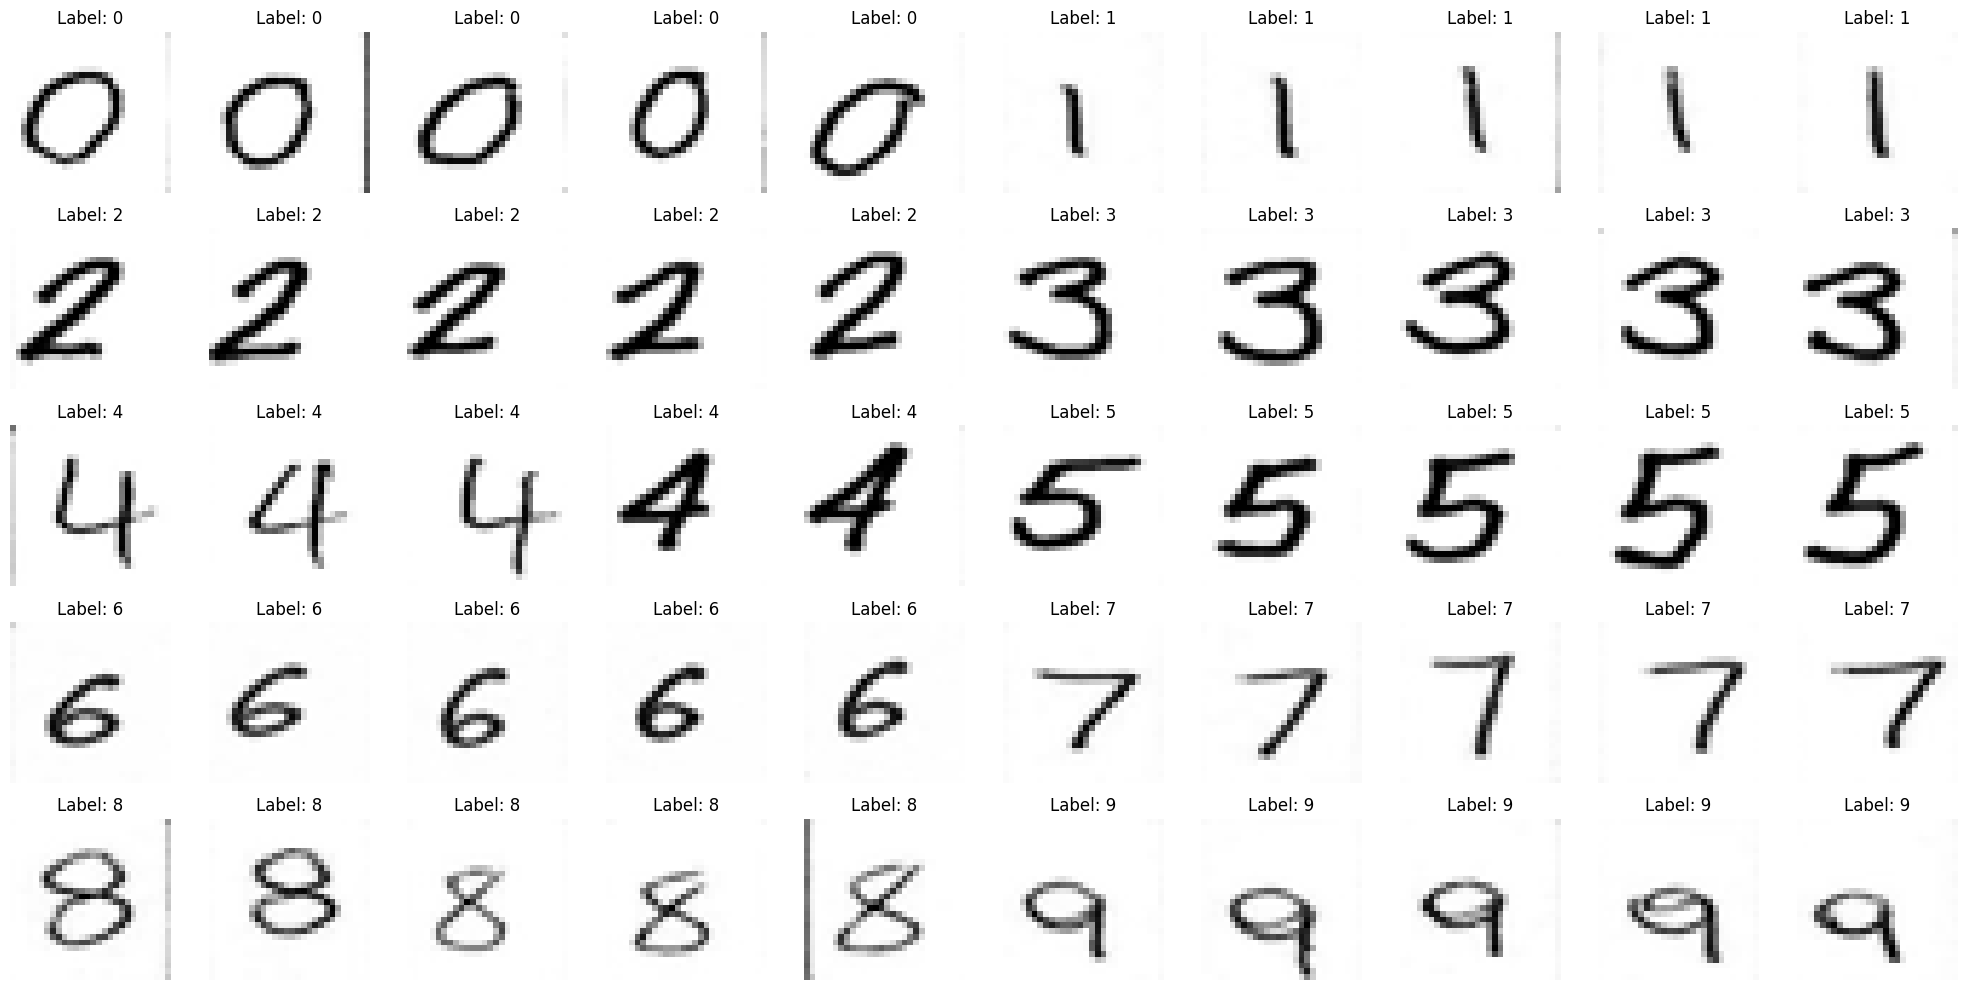

In [28]:
handwritten_images = glob.glob(os.path.join(custom_samples_dir, "*", "*.png"))

fig, axes = plt.subplots(nrows=(len(handwritten_images) - 1)// 10 + 1, ncols=10, figsize=(20, 2 * ((len(handwritten_images) -1)// 10 + 1)))
axes = axes.flatten()
for idx, img_file in enumerate(handwritten_images):
    digit_label = os.path.basename(os.path.dirname(img_file)).split()[-1] 
    img = Image.open(img_file)
    axes[idx].imshow(img, cmap='gray')
    axes[idx].title.set_text(f"Label: {digit_label}")
    axes[idx].axis('off')

for idx in range(len(handwritten_images), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### Load model

In [22]:
network = TwoLayerNetWithBackProp(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
network.load_params("adupa_mnist_model.pkl")

#### Testing model

In [24]:
for digit_folder in handwritten_images:
    digit_label = os.path.basename(os.path.normpath(digit_folder)).split()[-1] 
    for img_file in glob.glob(digit_folder + "*.png"):        
        image_array = load_image(img_file)
        prediction = np.argmax(network.predict(image_array.reshape(1, -1)))
        
        if prediction == int(digit_label):
            print(f"Success: Image {os.path.basename(img_file)} is for digit {digit_label} is recognized as {digit_label}.")
        else:
            print(f"Fail: Image {os.path.basename(img_file)} is for digit {digit_label} but the inference result is {prediction}.")

Fail: Image 0_0.png is for digit 0 but the inference result is 7.
Fail: Image 0_1.png is for digit 0 but the inference result is 7.
Fail: Image 0_2.png is for digit 0 but the inference result is 7.
Fail: Image 0_3.png is for digit 0 but the inference result is 7.
Fail: Image 0_4.png is for digit 0 but the inference result is 7.
Fail: Image 1_0.png is for digit 1 but the inference result is 6.
Success: Image 1_1.png is for digit 1 is recognized as 1.
Fail: Image 1_2.png is for digit 1 but the inference result is 5.
Success: Image 1_3.png is for digit 1 is recognized as 1.
Success: Image 1_4.png is for digit 1 is recognized as 1.
Fail: Image 2_0.png is for digit 2 but the inference result is 5.
Fail: Image 2_1.png is for digit 2 but the inference result is 5.
Fail: Image 2_2.png is for digit 2 but the inference result is 0.
Fail: Image 2_3.png is for digit 2 but the inference result is 5.
Success: Image 2_4.png is for digit 2 is recognized as 2.
Success: Image 3_0.png is for digit 3 is r